In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer


In [3]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.624706572769953

In [17]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [18]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [19]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [22]:
trf.named_transformers_['first'].n_bins_

array([10])

In [23]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [24]:
output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf': X_train_trf[:, 0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:, 1]
})

In [25]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                             bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

In [26]:
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                              bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [27]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
809,33.0,6.0,53.1000,8.0,"(32.0, 36.0]","(51.479, 82.171]"
628,26.0,4.0,7.8958,2.0,"(25.0, 28.5]","(7.75, 7.896]"
437,24.0,3.0,18.7500,5.0,"(22.0, 25.0]","(15.75, 26.0]"
81,29.0,5.0,9.5000,3.0,"(28.5, 32.0]","(9.225, 13.0]"
571,53.0,9.0,51.4792,8.0,"(50.0, 80.0]","(29.125, 51.479]"


In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [29]:
accuracy_score(y_test, y_pred2)

0.6223776223776224

In [30]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring = 'accuracy'))

0.6345266040688575

In [34]:
def descretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy = strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy = strategy)
    
    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])
    
    x_trf = trf.fit_transform(X)
    
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:, 0], color='red')
    plt.title("After")
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:, 1], color='green')
    plt.title("Fare")
    plt.show()

0.6275039123630674


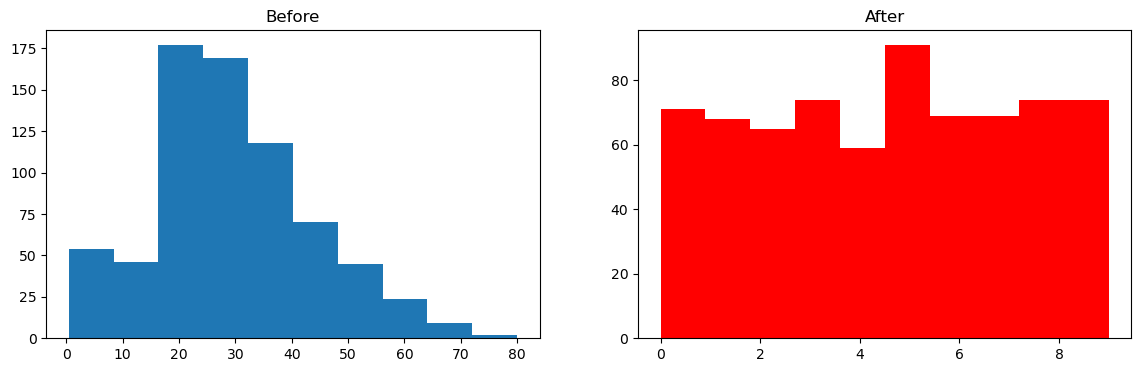

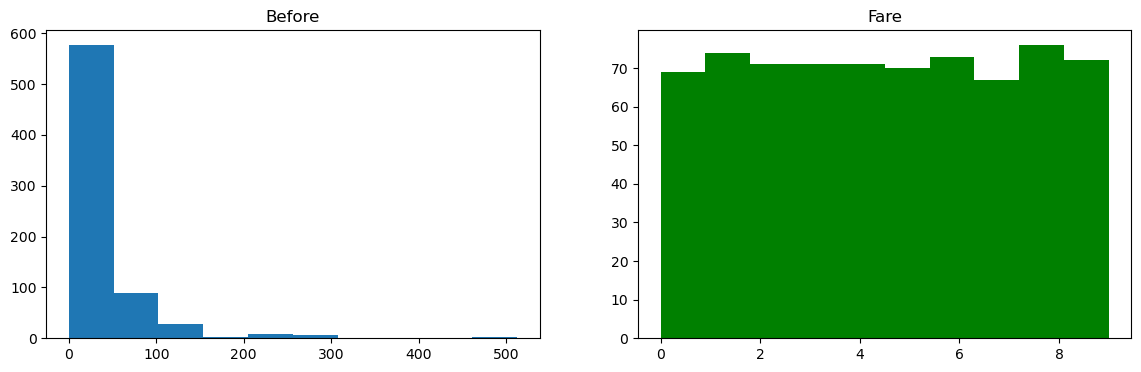

In [35]:
descretize(10, 'quantile')

0.6218896713615022


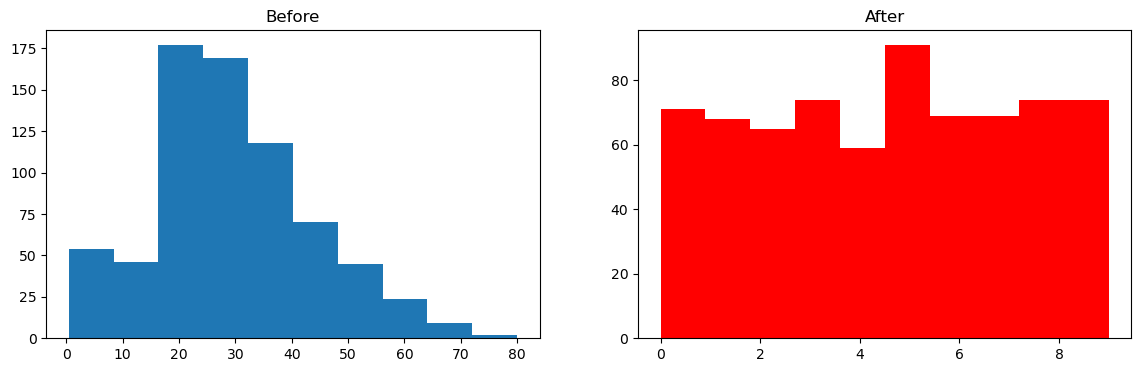

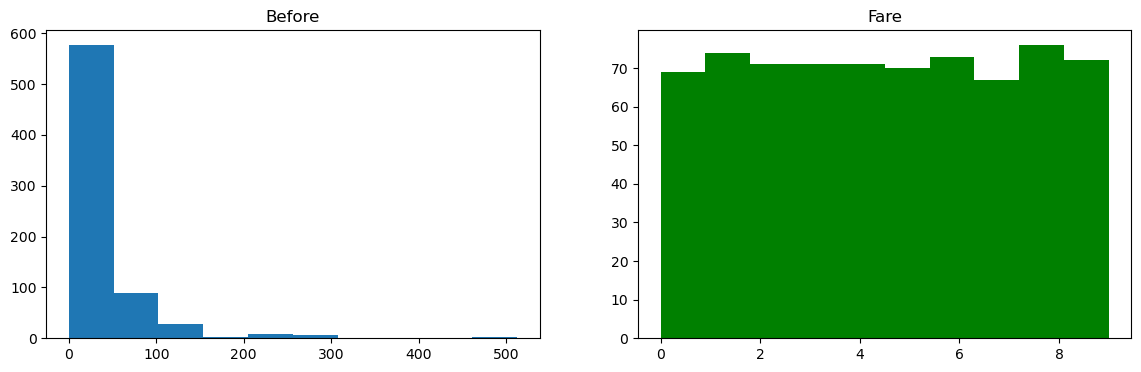

In [36]:
descretize(10, 'uniform')

C:\Users\Adnan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Adnan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.630281690140845


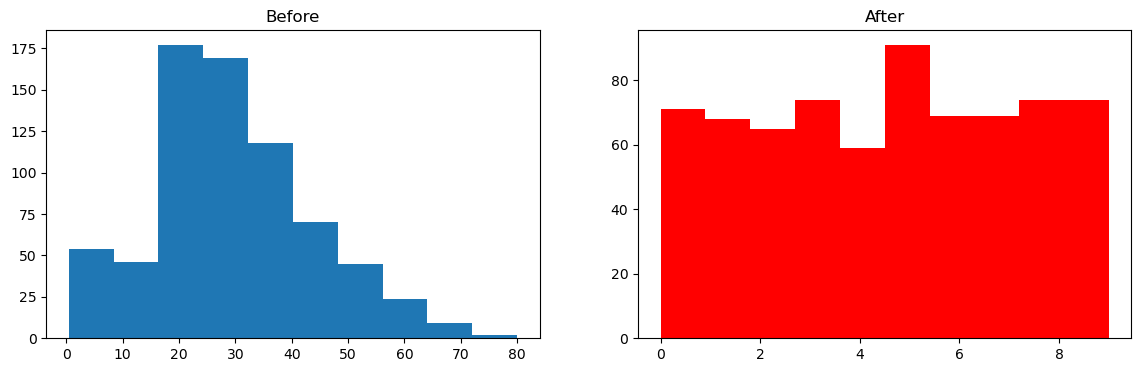

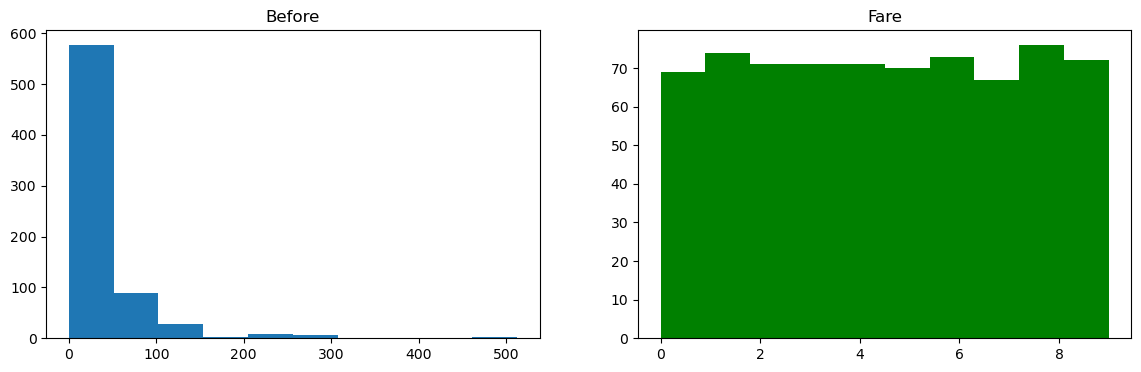

In [37]:
descretize(5, 'kmeans')